## Обыкновенные дифференциальные уравнения

### Задача Коши
### Методы Рунге-Кутты. Методы Адамса


Цыбулин Иван ([tsybulin@crec.mipt.ru](mailto:tsybulin@crec.mipt.ru))

## Задача Коши для ОДУ

Рассмотрим дифференциальное уравнение первого порядка вида
$$
\frac{dy(t)}{dt} = G(t, y(t)), \qquad 0 < t \leqslant T
$$

Чтобы выделить единственное решение, небходимо наложить дополнительные условия, например,
$$
 y\Big|_{t=0} =  y_0
$$
Так поставленная задача называется *задачей Коши*.

### Сетка

Для решения задачи Коши на отрезке $[0, T]$ вводят сетку (равномерную или неравномерную), а вместо функции $y(t)$ ищут ее значения в узлах сетки.

![grid](grid-0.png)

### Сеточная функция

Функция $u_n$, заданная в узлах сетки, в отличие от непрерывной $y(t)$, является элементом конечномерного пространства $\mathbb R^N$. Из любой непрерывной функции $y(t)$ можно получить сеточную, данная операция называется проецированием:
$$
u_n = [y]_n \equiv y(t_n)
$$

<img src="proj2.png" height="200px">

### Разностная задача

Для нахождения сеточной функции формулируется *разностная задача*, «похожая» на исходную дифференциальную.

Например,
$$
\begin{cases}
\frac{dy}{dt} + \sin y(t) = 1, \quad 0 < t \leqslant 2\\
y(0) = 5
\end{cases}
\quad\Longrightarrow
\quad
\begin{cases}
\frac{u_{n+1} - u_n}{\tau} + \sin u_n = 1, \quad n = 0, \dots, N-1\\
u_0 = 5
\end{cases}
$$

Легко видеть, что при стремлении $\tau \to 0$ разностная задача переходит в дифференциальную.

### Аппроксимация

Более строго, говорят, что разностная задача *аппроксимирует* дифференциальную, если проекция точного решения дифференциальной задачи удовлетворяет разностной задаче с малой невязкой. Эта невязка называется ошибкой аппроксимации.

Чем меньше ошибка аппроксимации, тем точнее разностная задача приближает дифференциальную. Если ошибка аппроксимации имеет величину $O(\tau^p)$, то говорят, что порядок аппроксимации равен $p$.

### Изучение аппроксимации

Рассмотрим дифференциальную задачу Коши
$$
y'(t) + \sin y(t) = 0\\
y(0) = 1
$$
и разностную задачу
$$
\frac{u_{n+1} - u_n}{\tau} + \sin \left(u_n - \frac{\tau}{2} \sin u_n\right) = 0\\
u_0 = 1
$$

Для изучения аппроксимации подставим $u_n = [y]_n$.

### Изучение аппроксимации

После подстановки в разностном уравнении возникает невязка ($[y]_n$ &mdash; не решение разностной задачи)
$$
\frac{[y]_{n+1} - [y]_n}{\tau} + \sin \left([y]_n - \frac{\tau}{2} \sin [y]_n\right) = \color{red}{\delta_{n+1}}\\
[y]_0 = 1 + \color{red}{\delta_0}
$$

Так как $[y]_0 = y(0) = 1$, ошибка аппроксимации в нулевом узле $\delta_0$ равна нулю. Найдем величину $\delta_{n+1}$, учитывая, что $y(t)$ удовлетворяет условиям
$$
y'(t) + \sin y(t) = 0\\
y(0) = 1
$$

### Изучение аппроксимации

$$
\delta_{n+1} = \frac{[y]_{n+1} - [y]_n}{\tau} + \sin \left([y]_n - \frac{\tau}{2} \sin [y]_n\right)
$$
Пользуясь формулой Телора можем записать:
$$
y(t_n + \tau) = y(t_n) + \tau y'(t_n) + \frac{\tau^2}{2} y''(t_n) + \frac{\tau^3}{6} y'''(t_n) + O(\tau^4)
$$
Используя обозначение проекции, эта формула запишется в виде
$$
[y]_{n+1} = [y]_n + \tau [y']_n + \frac{\tau^2}{2} [y'']_n + \frac{\tau^3}{6} [y''']_n + O(\tau^4)
$$


### Изучение аппроксимации

$$
[y]_{n+1} = [y]_n + \tau [y']_n + \frac{\tau^2}{2} [y'']_n + \frac{\tau^3}{6} [y''']_n + O(\tau^4)
$$

$$
\begin{aligned}
\delta_{n+1} 
&= \frac{[y]_{n+1} - [y]_n}{\tau} + \sin \left([y]_n - \frac{\tau}{2} \sin [y]_n\right) = \\ 
&= [y']_n + \frac{\tau}{2}[y'']_n + \frac{\tau^2}{6}[y''']_n + O(\tau^3) + \\
&{} + \sin [y]_n - \frac{\tau}{2} \sin [y]_n \cos [y]_n 
{} - \frac{\tau^2}{8} \sin^3 [y]_n + O(\tau^3)
\end{aligned}
$$

### Изучение аппроксимации

Собирая слагаемые одного порядка вместе, получаем
$$
\delta_{n+1} = ([y']_n + \sin [y]_n) + \frac{\tau}{2}([y'']_n - \sin [y]_n \cos [y]_n) + \frac{\tau^2}{24} (4[y''']_n - 3\sin^3 [y]_n) + O(\tau^3)
$$
Слагаемое $[y']_n + \sin [y]_n$ обнуляется, так как $y' + \sin y = 0$. Но оказывается, что и второе слагаемое также обнуляется:
$$
y' = -\sin y \implies
y'' = -y'\cos y  = \sin y\cos y
$$
Таким образом, $\delta_{n+1} = O(\tau^2)$. Имеем апроксимацию второго порядка.

### Устойчивость

Оказывается, что одной аппроксимации недостаточно, чтобы гарантировать близость решений разностной задачи $u_n$ и точного решения диффернциальной задачи $[y]_n$. Для этого необходимо, чтобы разностная задача была *устойчивой*.

Пусть $u_n$ &mdash; решение разностной задачи, а $v_n$ &mdash; решение возмущенной задачи:
$$
\begin{cases}
\frac{u_{n+1} - u_n}{\tau} + \sin \left(u_n - \frac{\tau}{2} \sin u_n\right) = 0\\
u_0 = 1
\end{cases}
\qquad
\begin{cases}
\frac{v_{n+1} - v_n}{\tau} + \sin \left(v_n - \frac{\tau}{2} \sin u_v\right) = \color{red}{\epsilon_{n+1}}\\
u_0 = 1 + \color{red}{\epsilon_0}
\end{cases}
$$

Устойчивость разностной задачи означает существование такой константы $C$, что
$$
\max_n |u_n - v_n| \leqslant C \max_n |\epsilon_n|,
$$
причем $C$ не зависит от шага $\tau$.

In [12]:
import numpy as np

def difference_solution(N, eps=0):
    T = 1.0
    tau = T / N
    u = np.zeros(N+1)
    u[0] = 1 + eps * np.random.rand(1)
    for n in range(N):
        k1 = -np.sin(u[n])
        k2 = -np.sin(u[n] + tau/2 * k1)
        u[n+1] = u[n] + tau * k2 + tau * eps * np.random.rand(1)
    return u
# Проверяем устойчивость
for N in 2**np.arange(3, 10):
    u = difference_solution(N)
    v = difference_solution(N, 1e-6)
    print('N =', N, ' max |u_n - v_n| =', np.linalg.norm(u - v, np.inf))

N = 8  max |u_n - v_n| = 7.0643050476e-07
N = 16  max |u_n - v_n| = 8.03801930682e-07
N = 32  max |u_n - v_n| = 7.20776045626e-07
N = 64  max |u_n - v_n| = 4.28423205578e-07
N = 128  max |u_n - v_n| = 3.53711414103e-07
N = 256  max |u_n - v_n| = 7.21712172358e-07
N = 512  max |u_n - v_n| = 3.8929621804e-07


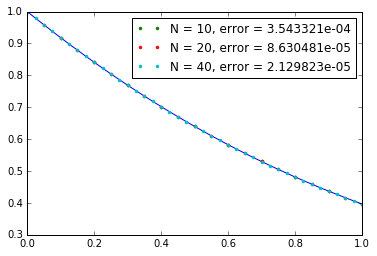

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

def exact_solution(t): return 2 * np.arctan(np.exp(-t) * np.tan(0.5))
# Сравним численное решение с точным
plt.plot(np.linspace(0, 1, 1000), exact_solution(np.linspace(0, 1, 1000)))
for N in [10, 20, 40]:
    u = difference_solution(N)
    y = exact_solution(np.linspace(0, 1, N+1))
    plt.plot(np.linspace(0, 1, N+1), u, '.',
        label='N = %d, error = %e' % (N, np.linalg.norm(u - y, np.inf)))
plt.legend(); plt.show()

### Неустойчивые схемы
Рассмотрим следующую разностную задачу
$$
\frac{2u_{n+1} + u_n - 3 u_{n-1}}{5\tau} +
\frac{9 \sin u_n + \sin u_{n-1}}{10} = 0, \quad n = 1, \dots, N-1\\
u_0 = 1, \qquad u_1 = 1 - \tau \sin 1
$$
Можно убедиться, что эта задача аппроксимирует со вторым порядком ту же дифференциальную задачу
$$
y'(t) + \sin y(t) = 0\\
y(0) = 1
$$

In [26]:
def unstable_method(N, eps=0):
    T = 1.0
    tau = T / N
    u = np.zeros(N+1)
    u[0] = 1 + eps * np.random.rand(1)
    u[1] = 1 - tau * np.sin(1) + eps * np.random.rand(1)
    for n in range(1, N):
        rhs = 0.9 * np.sin(u[n]) + 0.1 * np.sin(u[n-1])
        u[n+1] = 0.5*(3*u[n-1]-u[n] - 5*tau*rhs + 5*tau*eps*np.random.rand(1))
    return u
# Проверяем устойчивость
for N in 2**np.arange(3, 10):
    u = unstable_method(N)
    v = unstable_method(N, 1e-6)
    print('N =', N, ' max |u_n - v_n| =', np.linalg.norm(u - v, np.inf))

N = 8  max |u_n - v_n| = 5.57383362154e-06
N = 16  max |u_n - v_n| = 0.000422585953988
N = 32  max |u_n - v_n| = 0.0864150519454
N = 64  max |u_n - v_n| = 24380.7386585
N = 128  max |u_n - v_n| = 3.37333692632e+15
N = 256  max |u_n - v_n| = 1.94248734307e+38
N = 512  max |u_n - v_n| = 3.50060667232e+83


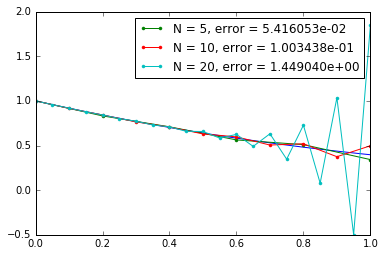

In [29]:
# Сравним численное решение с точным
plt.plot(np.linspace(0, 1, 1000), exact_solution(np.linspace(0, 1, 1000)))
for N in [5, 10, 20]:
    u = unstable_method(N)
    y = exact_solution(np.linspace(0, 1, N+1))
    plt.plot(np.linspace(0, 1, N+1), u, '.-',
        label='N = %d, error = %e' % (N, np.linalg.norm(u - y, np.inf)))
plt.legend(); plt.show()

### Методы Рунге-Кутты

Методы Рунге-Кутты относятся к одношаговым методам, то есть для вычисления решения в узле $t_{n+1}$ необходимо знать лишь решение в узле $t_n$. Каждый такой шаг состоит из нескольких *стадий*. На каждой стадии вычисляется вспомогательная величина &mdash; наклон $k_i, \; i = 1, \dots, s$, $s$ &mdash; число стадий.

### Шаг метода Рунге-Кутты
Для уравнения (или системы уравнений) 
$$
\mathbf y'(t) = \mathbf G(t, \mathbf y(t))
$$
один шаг $s$-стадийного метода Рунге-Кутты для перехода от $t_n$ к $t_{n+1}$ задается формулами
$$
\begin{array}{c}
\mathbf k_1 = \mathbf G\left(t_n + c_1 \tau, \mathbf u_n + \tau\sum_{j=1}^s a_{1j} \mathbf k_j\right)\\
\vdots\\
\mathbf k_s = \mathbf G\left(t_n + c_s \tau, \mathbf u_n + \tau\sum_{j=1}^s a_{sj} \mathbf k_j\right)\\
\frac{\mathbf u_{n+1} - \mathbf u_n}{\tau} = \sum_{i=1}^s b_i \mathbf k_i
\end{array}
\qquad
\begin{array}{c|cccc}
c_1 & a_{11} & a_{12} & \dots & a_{1s}\\
c_2 & a_{21} & a_{22} & \dots & a_{2s}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
c_s & a_{s1} & a_{s2} & \dots & a_{ss}\\
\hline
& b_1 & b_2 & \dots & b_s
\end{array}
$$

### Коэффициенты метода
Числа $c_i, a_{ij}, b_i$ являются фиксированными константами, которые определяют конкретный численный метод. Их часто организуют в *таблицу Бутчера*
$$
\begin{array}{c|cccc}
c_1 & a_{11} & a_{12} & \dots & a_{1s}\\
c_2 & a_{21} & a_{22} & \dots & a_{2s}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
c_s & a_{s1} & a_{s2} & \dots & a_{ss}\\
\hline
& b_1 & b_2 & \dots & b_s
\end{array}
$$
Фактически, все свойства конкретного метода Рунге-Кутты определяются его таблицей Бутчера.

### Явные методы РК
Метод Рунге-Кутты называется явным, если его матрица $A$ содержит нули на главной диагонали и выше нее:
$$
\begin{array}{c}
\color{blue}{\mathbf k_1} = \mathbf G\left(t_n + c_1 \tau, \mathbf u_n\right)\\
\color{green}{\mathbf k_2} = \mathbf G\left(t_n + c_2 \tau, \mathbf u_n + \tau a_{21} \color{blue}{\mathbf k_1}\right)\\
\color{brown}{\mathbf k_3} = \mathbf G\left(t_n + c_3 \tau, \mathbf u_n + \tau a_{31} \color{blue}{\mathbf k_1} + \tau a_{32} \color{green}{\mathbf k_2}\right)\\
\vdots\\
\mathbf k_s = \mathbf G\left(t_n + c_s \tau, \mathbf u_n + \tau\sum_{j=1}^{s-1} a_{sj} \mathbf k_j\right)\\
\frac{\mathbf u_{n+1} - \mathbf u_n}{\tau} = \sum_{i=1}^s b_i \mathbf k_i
\end{array}
\qquad
\begin{array}{c|ccccc}
c_1 & 0 & 0 & 0 & \dots & 0\\
c_2 & a_{21} & 0 & 0 & \dots & 0\\
c_3 & a_{31} & a_{32} & 0 &\dots & 0\\
\vdots & \vdots & \vdots & \ddots & \ddots & \vdots\\
c_s & a_{s1} & a_{s2} & \dots & a_{s,s-1}& 0\\
\hline
& b_1 & b_2 & \dots & b_{s-1} & b_s
\end{array}
$$
Таким образом, все наклоны $\mathbf k_i$ вычисляются по явным формулам друг за другом.

### Полуявные методы РК
Метод Рунге-Кутты называется полуявным (диагонально-неявным), если его матрица $A$ содержит нули выше главной диагонали:
$$
\begin{array}{c}
\color{blue}{\mathbf k_1} = \mathbf G\left(t_n + c_1 \tau, \mathbf u_n + \tau a_{11} \color{blue}{\mathbf k_1}\right)\\
\color{green}{\mathbf k_2} = \mathbf G\left(t_n + c_2 \tau, \mathbf u_n + \tau a_{21} \color{blue}{\mathbf k_1} + \tau a_{22}\color{green}{\mathbf k_2}\right)\\
\color{brown}{\mathbf k_3} = \mathbf G\left(t_n + c_3 \tau, \mathbf u_n + \tau a_{31} \color{blue}{\mathbf k_1} + \tau a_{32} \color{green}{\mathbf k_2} + \tau a_{33}\color{brown}{\mathbf k_3}\right)\\
\vdots\\
\mathbf k_s = \mathbf G\left(t_n + c_s \tau, \mathbf u_n + \tau\sum_{j=1}^{s-1} a_{sj} \mathbf k_j\right)\\
\frac{\mathbf u_{n+1} - \mathbf u_n}{\tau} = \sum_{i=1}^s b_i \mathbf k_i
\end{array}
\qquad
\begin{array}{c|ccccc}
c_1 & a_{11} & 0 & 0 & \dots & 0\\
c_2 & a_{21} & a_{22} & 0 & \dots & 0\\
c_3 & a_{31} & a_{32} & a_{33} &\dots & 0\\
\vdots & \vdots & \vdots & \ddots & \ddots & \vdots\\
c_s & a_{s1} & a_{s2} & \dots & a_{s,s-1}& a_{ss}\\
\hline
& b_1 & b_2 & \dots & b_{s-1} & b_s
\end{array}
$$
Таким образом, все наклоны $\mathbf k_i$ вычисляются из алгебраических уравнений друг за другом.

### Неявные методы РК
В противном случае метод называется неявным. Для определения всех наклонов необходимо решить систему алгебраических уравнений относительно всех $\mathbf k_i$ одновременно
$$
\begin{cases}
\color{blue}{\mathbf k_1} = \mathbf G\left(t_n + c_1 \tau, \mathbf u_n + \tau a_{11} \color{blue}{\mathbf k_1} + \tau a_{21} \color{green}{\mathbf k_2} + \dots + \tau a_{1s} \color{brown}{\mathbf k_s}\right)\\
\color{green}{\mathbf k_2} = \mathbf G\left(t_n + c_2 \tau, \mathbf u_n + \tau a_{21} \color{blue}{\mathbf k_1} + \tau a_{22}\color{green}{\mathbf k_2} + \dots + \tau a_{2s}\color{brown}{\mathbf k_s}\right)\\
\vdots\\
\color{brown}{\mathbf k_s} = \mathbf G\left(t_n + c_s \tau, \mathbf u_n + \tau a_{s1} \color{blue}{\mathbf k_1} + \tau a_{s2}\color{green}{\mathbf k_2} + \dots + \tau a_{ss}\color{brown}{\mathbf k_s}\right)
\end{cases}\\
\frac{\mathbf u_{n+1} - \mathbf u_n}{\tau} = \sum_{i=1}^s b_i \mathbf k_i
$$

### Порядок аппроксимации метода РК
Порядок аппроксимации метода Рунге-Кутты можно определить из его коэффициентов. Обычно при рассмотрении методов Рунге-Кутты принимают дополнительные условия Кутты $c_i = \sum_j a_{ij}$. Эти условия значительно упрощают выкладки при анализе и не снижают общности рассматриваемых методов. Для того, чтобы метод имел порядок $p$ он должен удовлетворять следующим условиям порядка вплоть до $p$ вкючительно:
* Условия 1-го порядка: $\sum_{i=1}^s b_i = 1$
* Условия 2-го порядка: $\sum_{i=1}^s b_i c_i = 1/2$
* Условия 3-го порядка: $\sum_{i=1}^s b_i c_i^2 = 1/3, \quad \sum_{i,j=1}^s b_i a_{ij} c_j = 1/6$

In [34]:
def rk4step(tau, tn, un, G):
    k1 = G(tn, un)
    k2 = G(tn + 0.5*tau, un + 0.5*tau*k1)
    k3 = G(tn + 0.5*tau, un + 0.5*tau*k2)
    k4 = G(tn + tau, un + tau*k3)
    return un + tau * (k1 + 2*k2 + 2*k3 + k4) / 6.0

def G(t, u): return -np.sin(u)

def rk4(N):
    T = 1.0
    tau = T / N
    u = np.zeros(N+1)
    u[0] = 1
    for n in range(N):
        u[n+1] = rk4step(tau, tau*n, u[n], G)
    return u

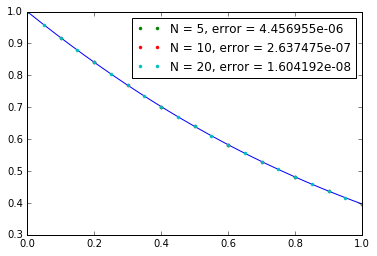

In [36]:
def exact_solution(t): return 2 * np.arctan(np.exp(-t) * np.tan(0.5))
# Сравним численное решение методом РК4 с точным
plt.plot(np.linspace(0, 1, 1000), exact_solution(np.linspace(0, 1, 1000)))
for N in [5, 10, 20]:
    u = rk4(N)
    y = exact_solution(np.linspace(0, 1, N+1))
    plt.plot(np.linspace(0, 1, N+1), u, '.',
        label='N = %d, error = %e' % (N, np.linalg.norm(u - y, np.inf)))
plt.legend(); plt.show()